# Point Evaluation

![](heat_square_pointevaluation.png)
## Introduction

For postprocessing puposes we often want to evaluate quantities in arbitrary points of the domain, e.g.
for plotting them along lines or planes through the domain. The `PointEvalHandler` (in combination with the `L2Projector`)
allows to extract field values in arbitrary points.

This example continues from the L2-projection example, where heat fluxes were interpolated from
integration points to nodes.

## Implementation

Start by simply running the L2-projection example to solve the problem, compute the heat fluxes and project them to nodes.

In [1]:
include("l2_projection.jl");

We will evaluate the temperature and teh heat flux distribution along a horizontal line (the black line in the picture above).

In [2]:
points = [Vec((x, 0.75)) for x in range(-1.0, 1.0, length=101)];

First, we need to generate a `PointEvalHandler`

In [3]:
ph = PointEvalHandler(dh, points);

After the L2-Projection, the heat fluxes are stored in `q_nodes` in nodal order. We can extract the heat fluxes in the `points` as follows:

In [4]:
q_points = Ferrite.get_point_values(ph, q_nodes);

We can also extract the field values, here the temperature, right away from the result vector of the simulation, that is stored in `u`. Opposed to the heat flux vector obtained from the `L2Projection`, the values are stored in the order of the degrees of freedom.
Therefore, we additionally give the field name which we want to extract from the dof-vector.
Notice that for using this function, the `PointEvalHandler` should always be constructed with the same `DofHandler`
which was used for computing the dof-vector.

In [5]:
u_points = Ferrite.get_point_values(ph, u, :u);

Now, we can plot the temperature and flux values with the help of any plotting library, e.g. Plots.jl.
To do this, we need to import the package:

In [6]:
import Plots

Firstly, we are going to plot the temperature values across the x-axis

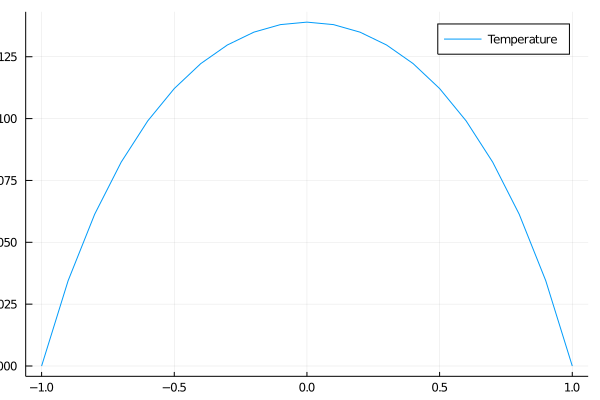

In [7]:
Plots.plot(getindex.(points,1), u_points, label="Temperature", xlabel="X-Coordinate", ylabel = "Temperature")

Secondly, the first index of the flux value at each node is plotted.

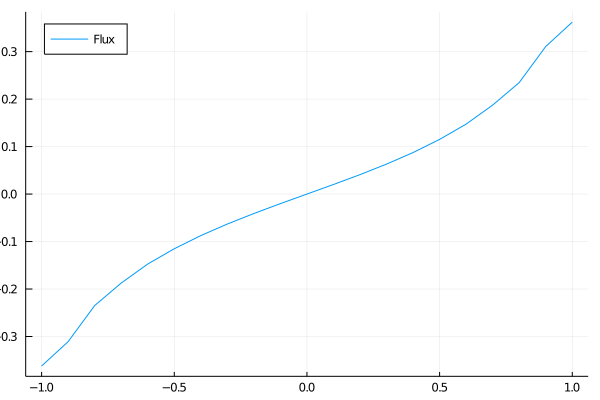

In [8]:
Plots.plot(getindex.(points,1), getindex.(q_points,1),label="Flux", legend=:topleft, xlabel = "X-Coordinate", ylabel = "Heat flux")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*